<div align="center">
  <h3 style="color:#8B0000;"><strong>Final Project</strong></h3>
</div>

<div align="center">
  <h1 style="color:#8B0000;"><strong>Applied Data Science with Python</strong></h1>
</div>

<div align="center">
  <h1 style="color:#8B0000;"><strong>Classification of Personal Loan Approval</strong></h1>
</div>

<div align="center">
  <h3 style=><strong>Deadline: August 30, 2024</strong></h3>
</div>

## **Project Overview**

In this final project, you will be tasked with developing a machine learning model to predict whether a customer will accept a personal loan offer based on their financial and demographic information. This project is designed to assess your understanding of classification algorithms, feature engineering, model evaluation, and the ability to derive actionable insights from data.

## **Dataset**

You will be working with a dataset provided in the notebook `bank_personal_loan.csv`, which contains customer information such as age, income, education, and credit card spending. The target variable is `Personal Loan`, which indicates whether a customer accepted the personal loan offer (1) or not (0).



The file bank_personal_loan.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

The following is the **structure of the data set**:


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>ID</b></td>
<td>Customer ID</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Age</b></td>
<td>Customer's age in completed years</td>
<td>25, 45, ...</td>
</tr>
<tr>
<td><b>Experience</b></td>
<td><br>Years of professional experience</td>
<td>1, 19, ...</td>
</tr>
<tr>
<td><b>Income</b></td>
<td>Annual income of the customer (1000 Dollar)</td>
<td>49, 34, ...</td>
</tr>
<tr>
<td><b>Zip Code</b></td>
<td>Home Address ZIP code</td>
<td>91107, 90089, ...</td>
</tr>
<tr>
<td><b>Family</b></td>
<td>Family size of the customer<br> (1, 2, 3, 4)</td>
<td>4, 3, ...</td>
</tr>
<tr>
<td><b>CCAvg</b></td>
<td>Avg. spending on credit cards per month (1000 Dollar)</td>
<td>1/60, 1/50, ...</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Education Level<br>(1: Undergrad; 2: Graduate; 3: Advanced/Professional)</td>
<td>1, 2, ...</td>
</tr>
<tr>
<td><b>Mortgage</b></td>
<td>Value of house mortgage if any. ($1000)</td>
<td>0, 101, ...</td>
</tr>
<tr>
<td><b>Personal Loan</b></td>
<td>Did this customer accept the personal loan offered in the last campaign?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Securityaccount</b></td>
<td>Does the customer have a securities account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Cd_account</b></td>
<td>Does the customer have a certificate of deposit (CD) account with this bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>Online</b></td>
<td>Does the customer use internet banking facilities?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
<tr>
<td><b>CreditCard</b></td>
<td>Does the customer use a credit card issued by Universal Bank?<br>(0, 1)</td>
<td>0, 1</td>
</tr>
</tbody>
</table>

## **Project Tasks**

### 1. **Exploratory Data Analysis (EDA)**


### 2. **Feature Engineering**
   

### 3. **Model Development**
  

### 4. **Model Interpretation and Insights**
   


## **Submission Requirements**

- Jupyter Notebook with all code and outputs, clearly commented and organized.



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt


In [2]:
# importing the Bank loan csv file 
df = pd.read_csv('bank_loan.csv')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


(   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
 0   1   25           1      49     91108       4  1/60          1         0   
 1   2   45          19      34     90089       3  1/50          1         0   
 2   3   39          15      11     94720       1  1/00          1         0   
 3   4   35           9     100     94112       1  2/70          2         0   
 4   5   35           8      45     91330       4  1/00          2         0   
 
    Personal Loan  Securities Account  CD Account  Online  CreditCard  
 0              0                   1           0       0           0  
 1              0                   1           0       0           0  
 2              0                   0           0       0           0  
 3              0                   0           0       0           0  
 4              0                   0           0       0           1  ,
 None)

In [3]:
# checking the dimension of the dataset 
df.shape

(5000, 14)

In [4]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# A list of the features in the dataset 
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# checking missing values 
missing_values = df.isnull().sum()
missing_values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# checking distribution of the data 
loan_distribution = df.describe().T
loan_distribution

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.3384,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.7742,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.5032,2121.852005,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.8810,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.00,0.0,0.00,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.00,0.0,0.00,1.0


### Insights from the distribution:
- Age is between 23 yrs to 67 yrs with an average of 45 yrs old. 
- The average experience is 20 years with -3 that seems to be an error in the data. 
- Income is between $8k and $224k with an average income of $73k. 
- Family size has an average of 2.3 
- Education seems to be evenly distributed among the three categories (undergrduate, graduate, Advanced/professional)
- Mortage is between $56k min and max of $635k with a significant number of clients with no mortgage.
- Personal loan is 9.6% of clients confirming the information on the project 

In [8]:
# creating a function to convert fraction into float for CCAvg feature
def fraction_to_num(fraction): 

    if isinstance(fraction, str) and '/' in fraction:
        try:
            numerator, denominator = fraction.split('/')
            denominator = float(denominator)
            if denominator == 0: 
                return None
            
            return float(numerator) / denominator
        except(ValueError, ZeroDivisionError): 
            return None
    else: 
        try:
            return float(fraction) if fraction else None
        except ValueError:
            return None

        

In [9]:
# converting CCAvg to float format 
df['CCAvg'] = df['CCAvg'].apply(fraction_to_num)
df['CCAvg'].head(10)

0    0.016667
1    0.020000
2         NaN
3    0.028571
4         NaN
5    0.000000
6    0.020000
7    0.000000
8    0.000000
9    0.088889
Name: CCAvg, dtype: float64

#### After the conversion there seems to be NaN rows in the CCAvg feature so it needs to be removed or replaced.

In [10]:
# check for rows with NaN
rows_with_nan = df['CCAvg'].isna()
rows_with_nan.head(10)

0    False
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: CCAvg, dtype: bool

In [11]:
# counting rows in the CCAvg column with NaN
nan_count = df['CCAvg'].isna().sum()
nan_count


1435

#### There are 1435 rows with NaN values in the CCAvg or spending on credit cards, which is more a third of the dataset. For proper analysis I will replace the NaN values with the median of CCAvg

In [12]:
# replace NaN values of CCAvg with median 
ccavg_median = df['CCAvg'].median()
df['CCAvg'].fillna(ccavg_median, inplace=True)

In [13]:
# check the median value
ccavg_median

0.0125

In [14]:
# check if there are any NaN values left
nan_count_new = df['CCAvg'].isna().sum()
nan_count_new

0

#### This is the last step of the Exploratory Data Analsysis and the data is now cleaned and ready for other steps such as visualization of features patterns.

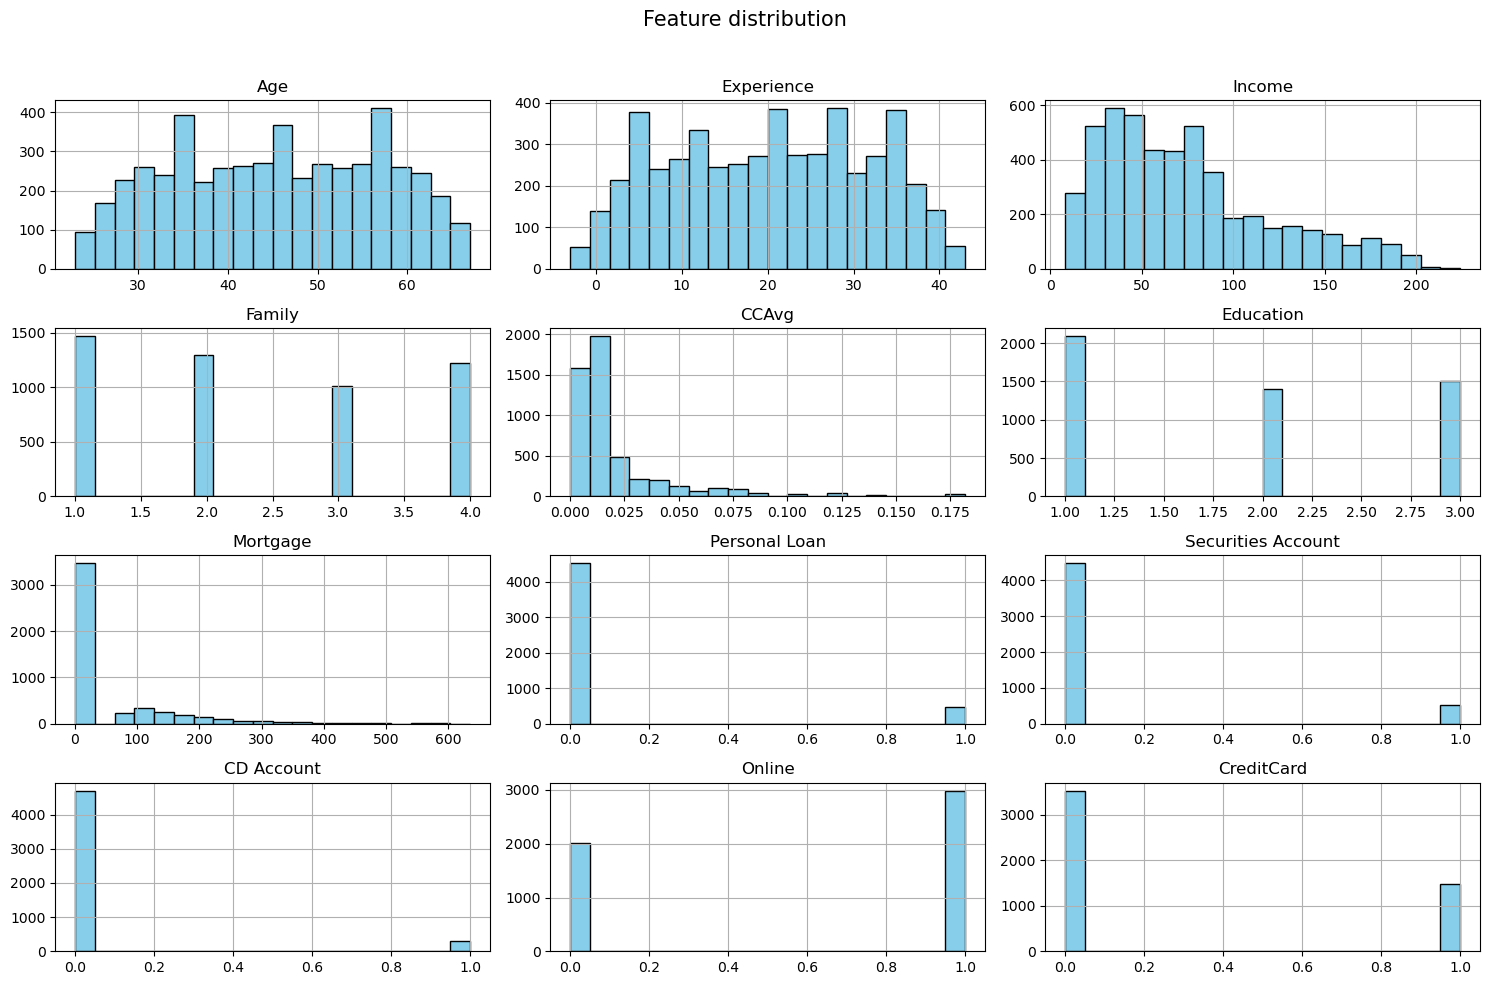

In [15]:
# Plot to visualize features distribution and patterns 
df_dropped = df.drop(columns=['ID', 'ZIP Code'])
df_dropped.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### The Age distribution seems to be normal with mos customers between 30 years old and 60 years old.
- Also the experience seems to have an error because of negative numbers 
- Most clients have an income between $0 and $100k and the distribution is skewed to the right from $100k to $200k
- Most clients don't have mortgage, CD account, Personal loan and Securities account. 
- Most clients are Undergrad followed by Advanced/professionals and Graduate 
- Most clients use Online services and don't have credit cards

In [16]:
# checking rows with negative experience
negative_experience =df[df['Experience'] < 0] 

# count rows with negative experience
negative_experience_count = negative_experience.shape[0]
negative_experience_count

52

In [17]:
# remove rows with negative columns 
df_cleaned = df[df['Experience'] >=0]
negative_experience_after = df_cleaned[df_cleaned['Experience'] <0].shape[0]
# verify if negative columns are removed
print(f'negative_experience:', negative_experience_count)
print(f'negative_experience_after:', negative_experience_after)

negative_experience: 52
negative_experience_after: 0


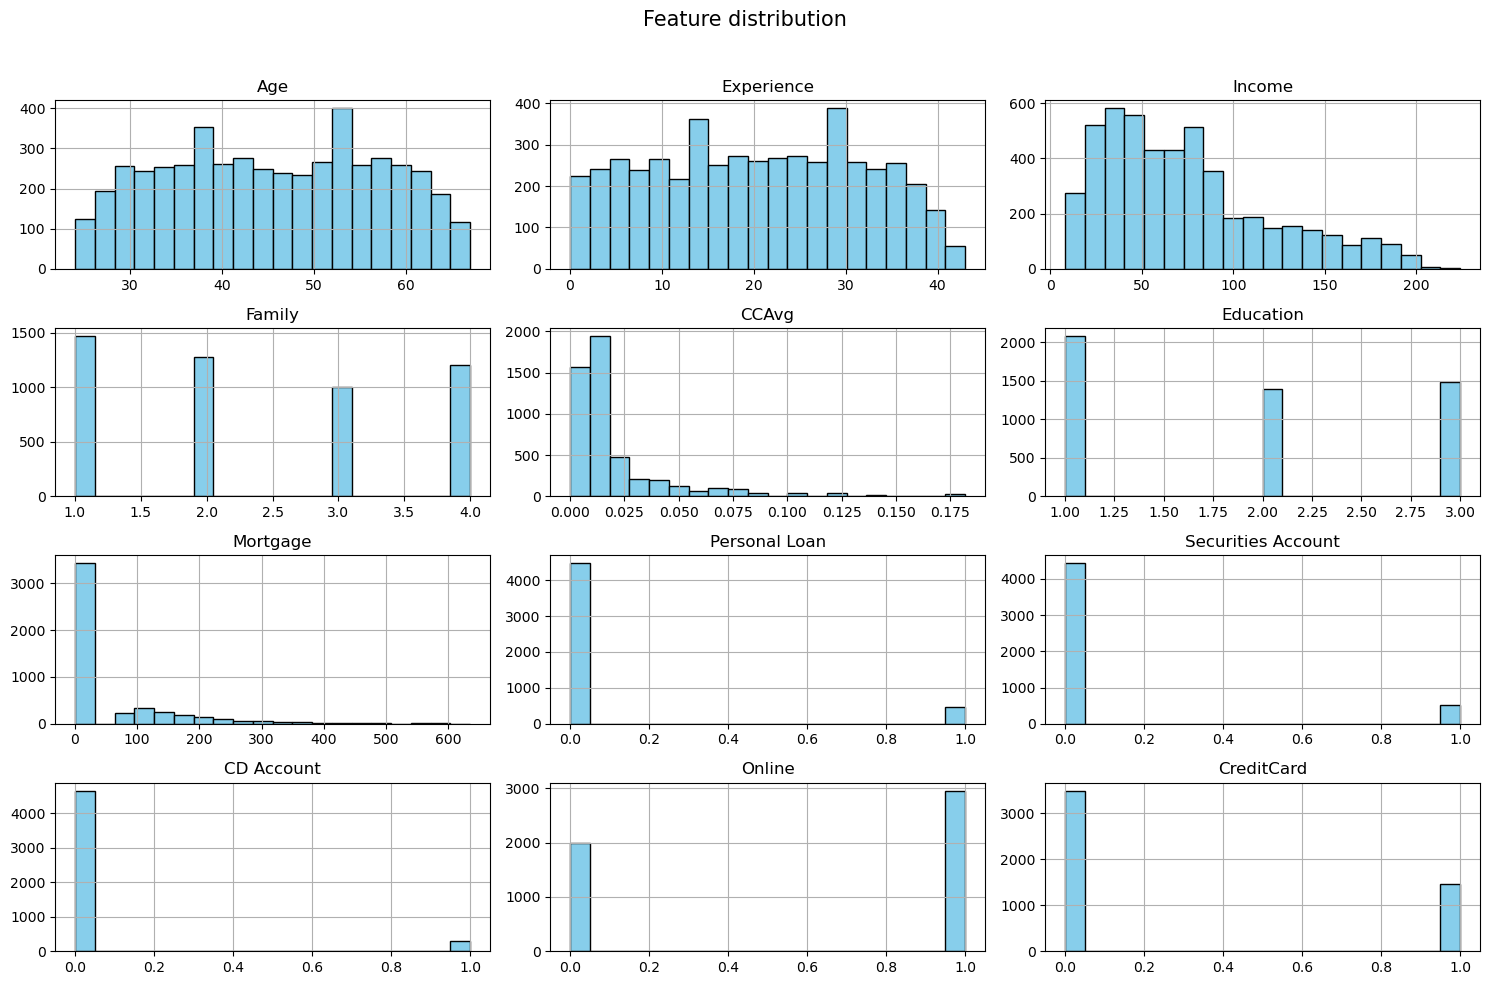

In [18]:
# final dataset cleaned 
df_final = df_cleaned.drop(columns=['ID', 'ZIP Code'])
df_final.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Features correlation analysis with Target variable personal loan 

In [19]:
# calculate correlation matrix 
correlation_matrix = df_final.corr()
correlation_matrix

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994101,-0.058006,-0.039279,-0.053527,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,0.994101,1.000000,-0.049245,-0.045610,-0.048543,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.058006,-0.049245,1.000000,-0.155666,0.452522,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
Family,-0.039279,-0.045610,-0.155666,1.000000,-0.082017,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.053527,-0.048543,0.452522,-0.082017,1.000000,-0.120844,0.072624,0.228930,0.017879,0.097876,-0.007249,-0.005411
Education,0.046222,0.018243,-0.187992,0.064032,-0.120844,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.015184,-0.013459,0.206921,-0.020419,0.072624,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.014204,-0.014121,0.504228,0.063088,0.228930,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776
Securities Account,0.000496,-0.000457,-0.002327,0.020155,0.017879,-0.007508,-0.003717,0.022216,1.000000,0.319056,0.016101,-0.017030
CD Account,0.003261,0.005450,0.170171,0.015274,0.097876,0.014639,0.089369,0.315769,0.319056,1.000000,0.176768,0.280151


In [20]:
# extract the correlation from the target variable personal loan
correlation_target = correlation_matrix['Personal Loan'].sort_values(ascending=False)
correlation_target

Personal Loan         1.000000
Income                0.504228
CD Account            0.315769
CCAvg                 0.228930
Mortgage              0.142322
Education             0.138339
Family                0.063088
Securities Account    0.022216
Online                0.006175
CreditCard            0.002776
Experience           -0.014121
Age                  -0.014204
Name: Personal Loan, dtype: float64

#### Key insights from correlation of features with target variable Personal loan 
- 50% correlation between Personal loan and income
- 31.57% correlation between Personal loan and CD Account 
- 22% correlation between Personal loan and credit card spending CCAvg

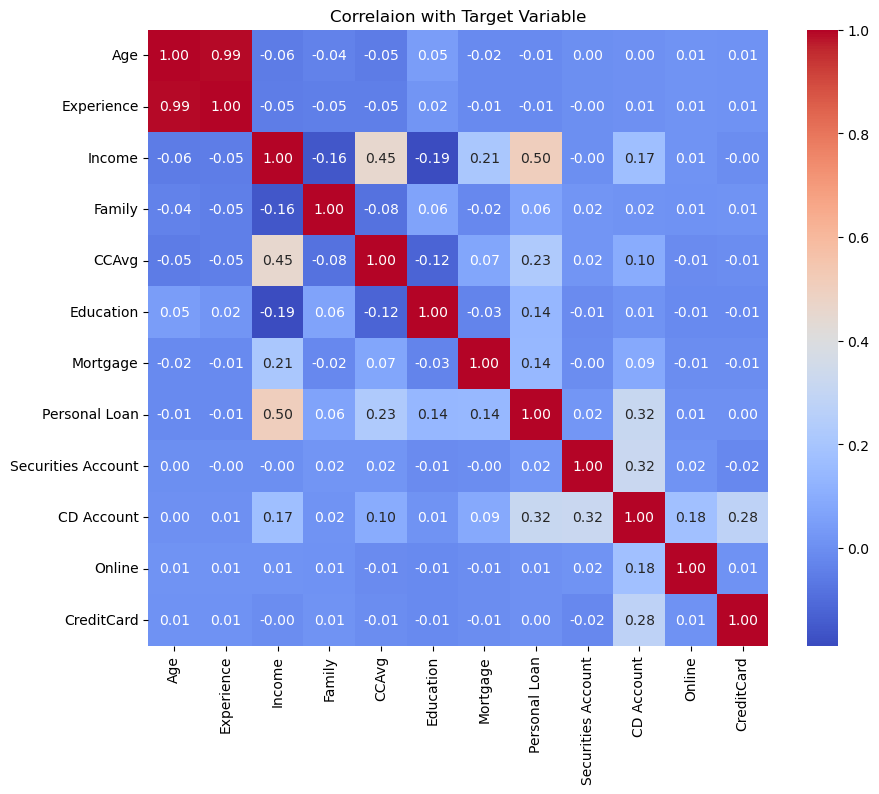

In [21]:
# visulaize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaion with Target Variable')
plt.show()

#### Feature Engineering 

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
# creating new features 
df_final['Income Family'] = df_final['Income'] * df_final['Family']
df_final['Income CCAvg'] = df_final['Income'] * df_final['CCAvg']
df_final['Family CC'] = df_final['Family'] * df_final['CCAvg']

In [24]:
# checking the max and min for the new features 
print(f'Income Family max:', df_final['Income Family'].max())
print(f'Income family min:', df_final['Income Family'].min())
print(f'Income CCAvg max:', df_final['Income CCAvg'].max())
print(f'Income CCAvg min:', df_final['Income CCAvg'].min())
print(f'Family CC max:', df_final['Family CC'].max())
print(f'Family CC min:', df_final['Family CC'].min())

Income Family max: 780
Income family min: 8
Income CCAvg max: 37.27272727272727
Income CCAvg min: 0.0
Family CC max: 0.7
Family CC min: 0.0


#### Income will be binned into three categories for better analysis. These categories are:
- Low 
-Medium
-High 
-Very High
-Rich

In [25]:
# creating a new dataframe with the different bins of Income
df_final['Income Category'] = pd.cut(df_final['Income'], bins=[0, 50, 100, 150, 200, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Rich'])
print(df_final['Income Category'].head(10))

0          Low
1          Low
2          Low
3       Medium
4          Low
5          Low
6       Medium
7          Low
8       Medium
9    Very High
Name: Income Category, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Rich']


#### The Experience feature can be binned into five categories: 
- Low 
- Moderate 
- Good 
- Professional 
- Expert 

In [26]:
df_final['Experience Category'] = pd.cut(df_final['Experience'], bins=[0, 10, 20, 30, 40, np.inf], labels=['Low', 'Moderate', 'Good', 'Professional', 'Expert'])
print(df_final['Experience Category'].head(10))

0         Low
1    Moderate
2    Moderate
3         Low
4         Low
5    Moderate
6        Good
7        Good
8         Low
9         Low
Name: Experience Category, dtype: category
Categories (5, object): ['Low' < 'Moderate' < 'Good' < 'Professional' < 'Expert']


In [27]:
df_final.isnull().sum()

Age                     0
Experience              0
Income                  0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
Income Family           0
Income CCAvg            0
Family CC               0
Income Category         0
Experience Category    66
dtype: int64

#### Feature scaling on the new features 
For the features that are skewed to the right we can do some Log transformation
- Income
- CCAvg
- Mortgage 

In [28]:
# log transformations for skewed features selected. Using log(1+x) to maintain better precision with small values
df_final['Log Income'] = np.log1p(df_final['Income'])
df_final['Log CCAvg'] = np.log1p(df_final['CCAvg'])
df_final['Log Mortgage'] = np.log1p(df_final['Mortgage'])
# Check for NaN values after log transformation
nan_values_before_scaling = df_final[['Log Income', 'Log CCAvg', 'Log Mortgage']].isna().sum()
inf_values_before_scaling = np.isinf(df_final[['Log Income', 'Log CCAvg', 'Log Mortgage']]).sum()
# new features scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final[['Income', 'CCAvg', 'Mortgage', 'Income Family', 'Income CCAvg', 'Family CC']])
# create a dataframe for the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=['Scaled Income', 'Scaled CCAvg', 'Scaled Mortgage', 'Scaled Income Family', 'Scaled Income CCAvg', 'Scaled Family CC'])
df_final = pd.concat([df_final, df_scaled], axis=1)
# verify if there are no NaN values after scaling 
nan_values_after_scaling = df_final[['Scaled Income', 'Scaled CCAvg', 'Scaled Mortgage']].isna().sum()
inf_values_after_scaling = np.isinf(df_final[['Scaled Income', 'Scaled CCAvg', 'Scaled Mortgage']]).sum()
# print 
nan_values_before_scaling, inf_values_before_scaling, nan_values_after_scaling, inf_values_after_scaling



(Log Income      0
 Log CCAvg       0
 Log Mortgage    0
 dtype: int64,
 Log Income      0
 Log CCAvg       0
 Log Mortgage    0
 dtype: int64,
 Scaled Income      51
 Scaled CCAvg       51
 Scaled Mortgage    51
 dtype: int64,
 Scaled Income      0
 Scaled CCAvg       0
 Scaled Mortgage    0
 dtype: int64)

In [29]:
df_final.isna().sum()

Age                      51
Experience               51
Income                   51
Family                   51
CCAvg                    51
Education                51
Mortgage                 51
Personal Loan            51
Securities Account       51
CD Account               51
Online                   51
CreditCard               51
Income Family            51
Income CCAvg             51
Family CC                51
Income Category          51
Experience Category     117
Log Income               51
Log CCAvg                51
Log Mortgage             51
Scaled Income            51
Scaled CCAvg             51
Scaled Mortgage          51
Scaled Income Family     51
Scaled Income CCAvg      51
Scaled Family CC         51
dtype: int64

In [30]:
# drop the NaN rows from the dataset 
df_final_cleaned = df_final.dropna()
# verify NaN values 
nan_values_after_cleaning = df_final_cleaned.isna().sum()
nan_values_after_cleaning

Age                     0
Experience              0
Income                  0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
Income Family           0
Income CCAvg            0
Family CC               0
Income Category         0
Experience Category     0
Log Income              0
Log CCAvg               0
Log Mortgage            0
Scaled Income           0
Scaled CCAvg            0
Scaled Mortgage         0
Scaled Income Family    0
Scaled Income CCAvg     0
Scaled Family CC        0
dtype: int64

In [31]:
df_final_cleaned.isnull().sum()

Age                     0
Experience              0
Income                  0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
Income Family           0
Income CCAvg            0
Family CC               0
Income Category         0
Experience Category     0
Log Income              0
Log CCAvg               0
Log Mortgage            0
Scaled Income           0
Scaled CCAvg            0
Scaled Mortgage         0
Scaled Income Family    0
Scaled Income CCAvg     0
Scaled Family CC        0
dtype: int64

#### Feature engineering

In [32]:
# create a dataframe for the scaled features 
df_final_cleaned = pd.concat([df_final_cleaned, df_scaled], axis=1)
df_final_cleaned = df_final_cleaned.dropna()
df_final_cleaned

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Scaled Mortgage,Scaled Income Family,Scaled Income CCAvg,Scaled Family CC,Scaled Income,Scaled CCAvg,Scaled Mortgage,Scaled Income Family,Scaled Income CCAvg,Scaled Family CC
0,25.0,1.0,49.0,4.0,0.016667,1.0,0.0,0.0,1.0,0.0,...,-0.556228,0.217733,-0.290265,0.367598,-0.538182,-0.089998,-0.556228,0.217733,-0.290265,0.367598
1,45.0,19.0,34.0,3.0,0.020000,1.0,0.0,0.0,1.0,0.0,...,-0.556228,-0.520696,-0.325207,0.263902,-0.863506,0.037054,-0.556228,-0.520696,-0.325207,0.263902
2,39.0,15.0,11.0,1.0,0.012500,1.0,0.0,0.0,0.0,0.0,...,-0.556228,-1.235558,-0.463913,-0.474931,-1.362335,-0.248812,-0.556228,-1.235558,-0.463913,-0.474931
3,35.0,9.0,100.0,1.0,0.028571,2.0,0.0,0.0,0.0,0.0,...,-0.556228,-0.536407,0.231440,-0.224950,0.567918,0.363759,-0.556228,-0.536407,0.231440,-0.224950
4,35.0,8.0,45.0,4.0,0.012500,2.0,0.0,0.0,0.0,0.0,...,-0.556228,0.092043,-0.355250,0.108359,-0.624935,-0.248812,-0.556228,0.092043,-0.355250,0.108359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,52.0,26.0,109.0,1.0,0.050000,1.0,308.0,0.0,0.0,1.0,...,-0.556228,0.445547,-0.259370,-0.086071,0.025712,-0.248812,-0.556228,0.445547,-0.259370,-0.086071
4944,49.0,24.0,33.0,3.0,0.014286,2.0,0.0,0.0,0.0,0.0,...,0.278590,-0.850632,-0.499068,-0.669361,-1.275582,-0.725257,0.278590,-0.850632,-0.499068,-0.669361
4945,42.0,18.0,49.0,2.0,0.014286,1.0,106.0,0.0,0.0,0.0,...,-0.556228,-0.944900,-0.499068,-0.669361,-1.080388,-0.725257,-0.556228,-0.944900,-0.499068,-0.669361
4946,51.0,26.0,42.0,1.0,0.012500,2.0,0.0,0.0,0.0,0.0,...,-0.556228,-0.167193,-0.499068,-0.669361,-0.538182,-0.725257,-0.556228,-0.167193,-0.499068,-0.669361


#### create polynomial features for income, ccavg, mortgage

In [33]:
# instantiate polynomial 
df_final_cleaned = df_final_cleaned.dropna(subset=['Income', 'CCAvg', 'Mortgage'])
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_final_cleaned[['Income', 'CCAvg', 'Mortgage']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())
df_final_cleaned = pd.concat([df_final_cleaned.reset_index(drop=True), df_poly], axis=1)
nan_check = df_final_cleaned.isna().sum()
nan_check

Age                     0
Experience              0
Income                  0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
Income Family           0
Income CCAvg            0
Family CC               0
Income Category         0
Experience Category     0
Log Income              0
Log CCAvg               0
Log Mortgage            0
Scaled Income           0
Scaled CCAvg            0
Scaled Mortgage         0
Scaled Income Family    0
Scaled Income CCAvg     0
Scaled Family CC        0
Scaled Income           0
Scaled CCAvg            0
Scaled Mortgage         0
Scaled Income Family    0
Scaled Income CCAvg     0
Scaled Family CC        0
Income                  0
CCAvg                   0
Mortgage                0
Income^2                0
Income CCAvg            0
Income Mortgage         0
CCAvg^2     

In [34]:
df_final_cleaned


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Scaled Family CC,Income,CCAvg,Mortgage,Income^2,Income CCAvg,Income Mortgage,CCAvg^2,CCAvg Mortgage,Mortgage^2
0,25.0,1.0,49.0,4.0,0.016667,1.0,0.0,0.0,1.0,0.0,...,0.367598,49.0,0.016667,0.0,2401.0,0.816667,0.0,0.000278,0.000000,0.0
1,45.0,19.0,34.0,3.0,0.020000,1.0,0.0,0.0,1.0,0.0,...,0.263902,34.0,0.020000,0.0,1156.0,0.680000,0.0,0.000400,0.000000,0.0
2,39.0,15.0,11.0,1.0,0.012500,1.0,0.0,0.0,0.0,0.0,...,-0.474931,11.0,0.012500,0.0,121.0,0.137500,0.0,0.000156,0.000000,0.0
3,35.0,9.0,100.0,1.0,0.028571,2.0,0.0,0.0,0.0,0.0,...,-0.224950,100.0,0.028571,0.0,10000.0,2.857143,0.0,0.000816,0.000000,0.0
4,35.0,8.0,45.0,4.0,0.012500,2.0,0.0,0.0,0.0,0.0,...,0.108359,45.0,0.012500,0.0,2025.0,0.562500,0.0,0.000156,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,52.0,26.0,109.0,1.0,0.050000,1.0,308.0,0.0,0.0,1.0,...,-0.086071,109.0,0.050000,308.0,11881.0,5.450000,33572.0,0.002500,15.400000,94864.0
4828,49.0,24.0,33.0,3.0,0.014286,2.0,0.0,0.0,0.0,0.0,...,-0.669361,33.0,0.014286,0.0,1089.0,0.471429,0.0,0.000204,0.000000,0.0
4829,42.0,18.0,49.0,2.0,0.014286,1.0,106.0,0.0,0.0,0.0,...,-0.669361,49.0,0.014286,106.0,2401.0,0.700000,5194.0,0.000204,1.514286,11236.0
4830,51.0,26.0,42.0,1.0,0.012500,2.0,0.0,0.0,0.0,0.0,...,-0.669361,42.0,0.012500,0.0,1764.0,0.525000,0.0,0.000156,0.000000,0.0


In [35]:
# one hot encoding for the categorical variables income bin and experience bin 
df_final_cleaned = pd.get_dummies(df_final_cleaned, columns=['Income Category', 'Experience Category'], drop_first=True)
df_final_cleaned.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,CCAvg Mortgage,Mortgage^2,Income Category_Medium,Income Category_High,Income Category_Very High,Income Category_Rich,Experience Category_Moderate,Experience Category_Good,Experience Category_Professional,Experience Category_Expert
0,25.0,1.0,49.0,4.0,0.016667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,False,False,False,False,False
1,45.0,19.0,34.0,3.0,0.020000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,False,False,False,True,False,False,False
2,39.0,15.0,11.0,1.0,0.012500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,False,False,False,True,False,False,False
3,35.0,9.0,100.0,1.0,0.028571,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,False,False,False,False,False,False,False
4,35.0,8.0,45.0,4.0,0.012500,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,False,False,False,False,False,False,False


#### Model Development 
- Logistic Regression
- Decision Tree
-Random Forest 
- Gradient boosting

In [36]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Logistic regression model. Naming the variables X and y
X = df_cleaned.drop(columns=['Personal Loan'])
y = df_cleaned['Personal Loan']
# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# instantiate and build model
model = LogisticRegression(max_iter=1000)
# train the model
model.fit(X_train,y_train)
# model envaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
# evaluation metrics 
accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy:', accuracy)
print(f'Confusion matrix:', conf_matrix)
print(f'Classification report:', class_report)



Accuracy: 0.9346801346801347
Confusion matrix: [[1305   36]
 [  61   83]]
Classification report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1341
           1       0.70      0.58      0.63       144

    accuracy                           0.93      1485
   macro avg       0.83      0.77      0.80      1485
weighted avg       0.93      0.93      0.93      1485



In [38]:
y_pred_proba

array([0.00294053, 0.0116132 , 0.00100489, ..., 0.04468405, 0.00343395,
       0.59369403])

#### The model shows an accuracy of 93% and performs well on predicting class 0 loan (customers that did not accept the loan). Class 0 is the majority class. 
- However, the model does not preform well on the class 1 loan (customers accepted the loan), precision(70%), recall(58%), support(63%)
- The dataset is very imbalanced. Much more 0 class (customers that did not accept loan) than 1 class (customers who accepted loan)

In [39]:
# Random forest Tree model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42 )
# train the model 
rf_model.fit(X_train, y_train)
# make predictions 
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]
# evaluate the model 
rf_accuracy = rf_model.score(X_test, y_test)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)
rf_roc_score = roc_auc_score(y_test,y_pred_proba_rf)

print(f'Random forest model performance:')
print(f'--------------------------------')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'Roc_auc_score: {rf_roc_score:.4f}\n')
print(f'Confusion matrix:\n{rf_conf_matrix}\n')
print(f'Classification report:')
print(class_report)

Random forest model performance:
--------------------------------
Accuracy: 0.9838
Roc_auc_score: 0.9854

Confusion matrix:
[[1337    4]
 [  20  124]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1341
           1       0.70      0.58      0.63       144

    accuracy                           0.93      1485
   macro avg       0.83      0.77      0.80      1485
weighted avg       0.93      0.93      0.93      1485



#### Interpretation of the random forest model 
- The overall performance of the model is good considering that the Accuracy socre is 98% and the Roc_auc_score is 98.54%. 
- However when we look at the precision and recall we can see that the model perform very well on class 0 which is client that did not accept the loan but not so good on class 1, clients that accepted the loan. The model precision for class 1 is 70% and recall is not good at 58%
- F1 score of 96% is also very good for customers that did not accept the loan, while for customers that accepted the loan the F1 score is 63%
- There is a class imbalance as the model predicts well on on class (0) and less on class (1)
 

#### We can improve the model performace using hyperameter tuning 

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# parameter setting
param_dist = {
    'n_estimators':[100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# initialize the model
rf_model_tune = RandomForestClassifier(random_state=42)
# randomized search with cross-validation 
random_search = RandomizedSearchCV(estimator=rf_model_tune, param_distributions=param_dist, n_iter=50, cv=3,verbose=2,n_jobs=-1)
# fit the random search
random_search.fit(X_train, y_train)
# print the best parameters
print(f'Best parameters: {random_search.best_params_}') 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}


In [45]:
best_model = random_search.best_estimator_
# evaluate the best model 
y_pred_best = best_model.predict(X_test)
y_pred_best_proba = best_model.predict_proba(X_test)[:,1]
accuracy_best = best_model.score(X_test, y_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)


In [46]:
# printing the evaluation models 
print(f"Best model accuracy: {accuracy_best:.4f}")
print(f"Best ROC AUC score: {roc_auc_best:.4f}\n")
print(f"Best confusion matrix score: {conf_matrix_best}\n")
print(f'Classification report:')
print(class_report_best)

Best model accuracy: 0.9825
Best ROC AUC score: 0.9904

Best confusion matrix score: [[1334    7]
 [  19  125]]

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1341
           1       0.95      0.87      0.91       144

    accuracy                           0.98      1485
   macro avg       0.97      0.93      0.95      1485
weighted avg       0.98      0.98      0.98      1485



### Model interpretation
#### The hyperparameter tuning gives insights on which model is the best. 
- The best model is Random forest classifier with these Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
- The model predicted correctly 98.25% of time which is good but not significantly different from previous models
- ROC AUC score is 99.04% which is exellent. This means that the best model predicts very well on both classes, customers who did not accept the loan and those who accepted
- The confusion matrix [1334, 7] [19, 125] shows: 
    - True Negatives (1334):Model predicted that 1334 customers did not accept the loan
    - False Positives (7):The model incorrectly predicted that 7 customers accepted the loan
    - False Negatives (19):The model incorrectly predicted 19 customers who did not accept the loan when they actually did accept the loan
    -True Positives (125):Thw model correctly predicted that 125 customers accepted the loan

- Classification report
    - Precision for class 0 is 99% and class 1 is 95%. This means that the model highly precise when predicting the two classes of personal loan. This is a significant improvemnt from other models 
    - Recall is 99% on class 0 and 87% on class 1. Out of all the customers that accepted the loan, the model correctly predicted 87% compared to other models. This is another significant improvement.
    -F1-score of 91% on class 1 shows that the model has a high performance and also that the model is well balanced

- Overall the fine tuning of the hyperparameter of the model, shows very good performance and it's an outstanding classifier for personal loan acceptance.  